In [1]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
env = gym.make('FrozenLake-v0')

In [4]:
tf.reset_default_graph

<function tensorflow.python.framework.ops.reset_default_graph()>

In [5]:
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)

In [6]:
W = tf.Variable(tf.random_uniform([16,4],0,0.01))

In [7]:
W

<tf.Variable 'Variable:0' shape=(16, 4) dtype=float32_ref>

In [8]:
Qout = tf.matmul(inputs1, W)

In [9]:
predict = tf.argmax(Qout, 1)

In [10]:
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)

In [11]:
loss = tf.reduce_sum(tf.square(nextQ - Qout))

In [12]:
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [13]:
updateModel = trainer.minimize(loss)

In [14]:
init = tf.global_variables_initializer()

In [1]:
y = 0.99
e  = 0.1
num_episodes = 2000

jList = []
rList = []

In [19]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        while j < 99:
            j += 1
            a,allQ = sess.run([predict, Qout], feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            s1,r,d,_ = env.step(a[0])
            Q1 = sess.run(Qout, feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            
            sess.run([updateModel], feed_dict={inputs1:np.identity(16)[s:s+1], nextQ: targetQ})
            rAll += r
            s = s1
            if d == True:
                e = 1.0/((i/50) + 10)
                break
        print(str(i) + '番目の試行が終了しました。')
        jList.append(j)
        rList.append(rAll)
    
print("Success Episode Ratio: " + str(sum(rList)/num_episodes) + "%")

Success Episode Ratio: 0.0545%


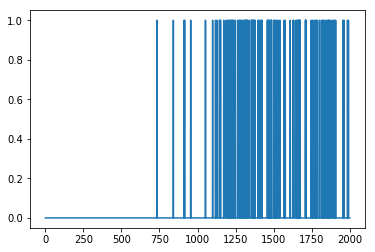

In [20]:
plt.plot(rList)

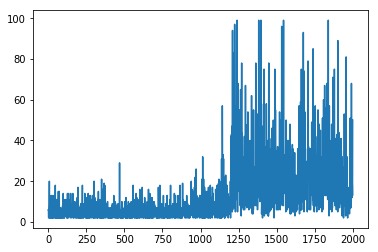

In [21]:
plt.plot(jList)